In [1]:
%%capture
!conda install pandas numpy matplotlib seaborn -y

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

In [3]:
excluded_columns = ['wave', 'd_d_age', 'd_importance_same_race', 'd_importance_same_religion', 'd_pref_o_attractive', 'd_pref_o_sincere',\
                   'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'd_attractive_o', \
                    'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'd_attractive_important', \
                    'd_sincere_important', 'd_intellicence_important', 'd_funny_important', 'd_ambtition_important', \
                   'd_shared_interests_important', 'd_attractive', 'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition', \
                   'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', \
                    'd_shared_interests_partner', 'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums', 'd_art', 'd_hiking', \
                    'd_gaming', 'd_clubbing', 'd_reading', 'd_tv', 'd_theater', 'd_movies', 'd_concerts', 'd_music', 'd_shopping', 'd_yoga', \
                   'd_interests_correlate', 'd_expected_happy_with_sd_people', 'd_expected_num_interested_in_me', \
                   'd_expected_num_matches', 'd_like', 'd_guess_prob_liked', 'field']
numeric_conv_cols = ['age', 'age_o', 'importance_same_race', 'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',\
                    'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', \
                    'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', \
                    'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', \
                    'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', \
                     'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', \
                     'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', \
                     'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', \
                    'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met']

df_res = pd.read_csv("speeddating.csv", low_memory=False)

# drop undesired columns
df_res = df_res.drop(excluded_columns, axis=1)

# replace undesired values
df_res = df_res.replace({'?':np.nan})

# format specific columns to numbers
for col in numeric_conv_cols:
    df_res[col] = pd.to_numeric(df_res[col])

df_res.head()

,has_null,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,...,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
0,0,female,21.0,27.0,6,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,...,0.14,3.0,2.0,4.0,7.0,6.0,0.0,1,0,0
1,0,female,21.0,22.0,1,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,...,0.54,3.0,2.0,4.0,7.0,5.0,1.0,1,0,0
2,1,female,21.0,22.0,1,'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2.0,4.0,...,0.16,3.0,2.0,4.0,7.0,NaN,1.0,1,1,1
3,0,female,21.0,23.0,2,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2.0,4.0,...,0.61,3.0,2.0,4.0,7.0,6.0,0.0,1,1,1
4,0,female,21.0,24.0,3,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2.0,4.0,...,0.21,3.0,2.0,4.0,6.0,6.0,0.0,1,1,1


In [4]:
', '.join(df_res.columns.tolist())

'has_null, gender, age, age_o, d_age, race, race_o, samerace, importance_same_race, importance_same_religion, pref_o_attractive, pref_o_sincere, pref_o_intelligence, pref_o_funny, pref_o_ambitious, pref_o_shared_interests, attractive_o, sinsere_o, intelligence_o, funny_o, ambitous_o, shared_interests_o, attractive_important, sincere_important, intellicence_important, funny_important, ambtition_important, shared_interests_important, attractive, sincere, intelligence, funny, ambition, attractive_partner, sincere_partner, intelligence_partner, funny_partner, ambition_partner, shared_interests_partner, sports, tvsports, exercise, dining, museums, art, hiking, gaming, clubbing, reading, tv, theater, movies, concerts, music, shopping, yoga, interests_correlate, expected_happy_with_sd_people, expected_num_interested_in_me, expected_num_matches, like, guess_prob_liked, met, decision, decision_o, match'

[Text(0, 0, 'NO'), Text(0, 0, 'YES')]

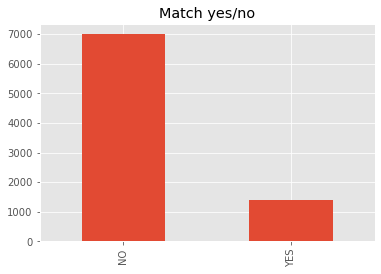

In [5]:
ax = df_res.match.value_counts().plot(kind='bar', title='Match yes/no')
ax.set_xticklabels(["NO", "YES"])

Text(0.5, 1.0, 'Feature correlation')

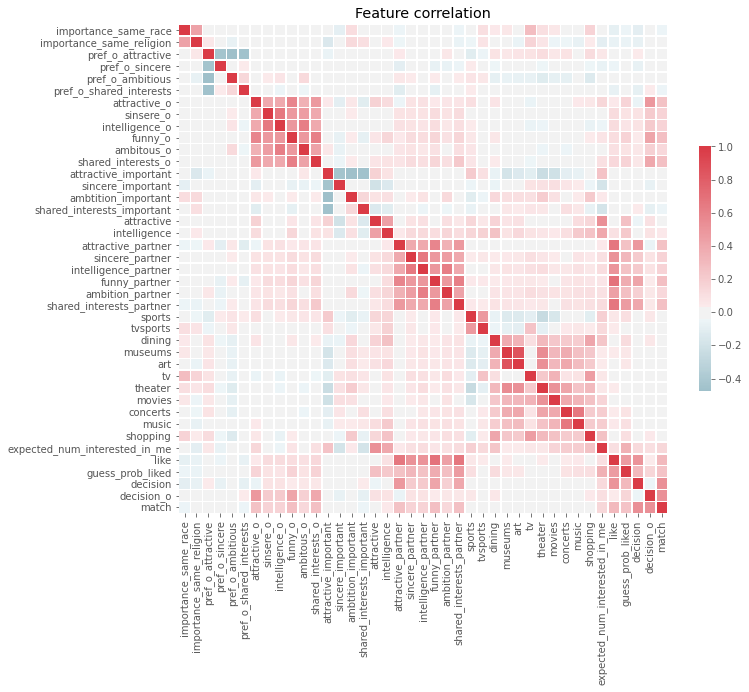

In [6]:
corr_th = 0.4
df_corr = df_res.corr()
np.fill_diagonal(df_corr.values, 0)
df_corr_red = df_corr.iloc[:, (df_corr.abs().max()>corr_th).values][df_corr.abs().max()>corr_th]
np.fill_diagonal(df_corr_red.values, 1)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr_red, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr_red, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Feature correlation')

In [7]:
df_corr_red

,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,...,movies,concerts,music,shopping,expected_num_interested_in_me,like,guess_prob_liked,decision,decision_o,match
importance_same_race,1.000000,0.430284,0.015809,-0.009304,-0.014219,0.013069,-0.015318,-0.010560,-0.027323,-0.004513,...,0.056329,0.006641,-0.031221,0.166566,-0.020693,-0.079486,-0.045972,-0.092271,-0.003779,-0.049032
importance_same_religion,0.430284,1.000000,0.062631,-0.008723,-0.072276,-0.018574,-0.029962,-0.021060,-0.027599,-0.022251,...,-0.045647,-0.038964,-0.075679,0.047621,-0.098260,-0.066149,-0.056413,-0.069210,-0.005735,-0.026014
pref_o_attractive,0.015809,0.062631,1.000000,-0.439447,-0.475981,-0.453623,0.022952,0.011568,-0.010081,0.032327,...,0.059948,0.079971,0.028541,0.120687,0.064495,0.028493,-0.003474,0.037882,-0.020910,0.015663
pref_o_sincere,-0.009304,-0.008723,-0.439447,1.000000,0.005628,0.037845,0.013344,0.003162,0.031220,0.012070,...,-0.026538,-0.029284,-0.004548,-0.042175,-0.062642,-0.052235,-0.017297,-0.069217,0.028900,-0.032391
pref_o_ambitious,-0.014219,-0.072276,-0.475981,0.005628,1.000000,0.145760,-0.030415,0.045045,0.077382,0.022640,...,-0.080881,-0.083011,-0.027706,-0.128761,0.013423,0.035624,0.035272,0.036339,-0.022224,-0.004650
pref_o_shared_interests,0.013069,-0.018574,-0.453623,0.037845,0.145760,1.000000,-0.016392,-0.036344,-0.044752,-0.032040,...,-0.009044,-0.029857,0.002079,-0.035112,-0.037024,-0.072521,-0.018714,-0.079243,0.042590,-0.048399
attractive_o,-0.015318,-0.029962,0.022952,0.013344,-0.030415,-0.016392,1.000000,0.399632,0.390744,0.586334,...,-0.020204,-0.000061,0.052242,0.059060,0.143983,0.049924,0.160793,-0.059360,0.486885,0.260837
sinsere_o,-0.010560,-0.021060,0.011568,0.003162,0.045045,-0.036344,0.399632,1.000000,0.657548,0.491453,...,-0.004637,0.009444,0.023465,-0.006888,-0.002304,0.119612,0.088097,0.081447,0.209811,0.164523
intelligence_o,-0.027323,-0.027599,-0.010081,0.031220,0.077382,-0.044752,0.390744,0.657548,1.000000,0.494097,...,-0.026176,-0.026117,-0.015495,-0.062093,-0.048331,0.122633,0.074843,0.081869,0.216704,0.169448
funny_o,-0.004513,-0.022251,0.032327,0.012070,0.022640,-0.032040,0.586334,0.491453,0.494097,1.000000,...,-0.022713,-0.017079,0.033943,0.040445,0.075027,0.117589,0.167388,0.044162,0.414276,0.277700


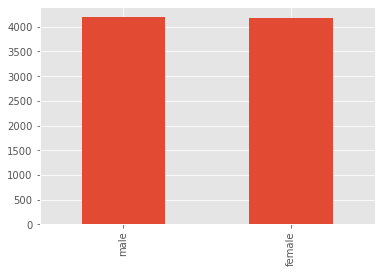

In [8]:
df_res.gender.value_counts().plot(kind='bar')

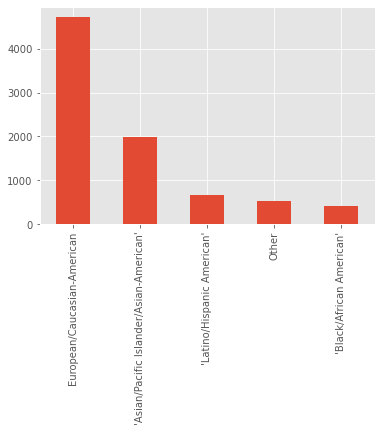

In [9]:
df_res.race.value_counts().plot(kind='bar')

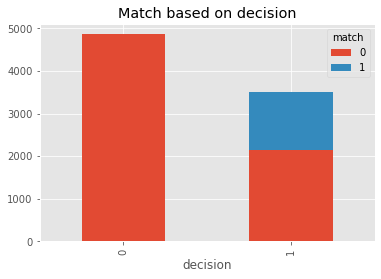

In [10]:
df_res.groupby(['decision', 'match'])['match'].count().unstack().fillna(0).plot(kind='bar', stacked=True, title="Match based on decision")

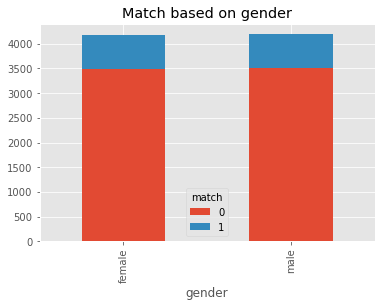

In [11]:
df_res.groupby(['gender', 'match'])['match'].count().unstack().fillna(0).plot(kind='bar', stacked=True, title="Match based on gender")

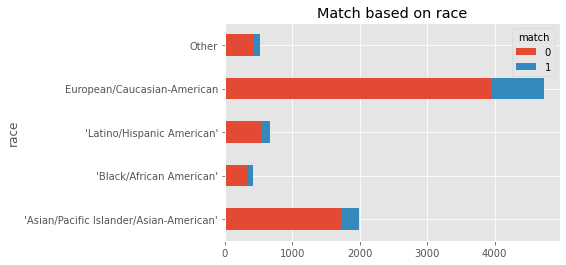

In [12]:
df_res.groupby(['race', 'match'])['match'].count().unstack().fillna(0).plot(kind='barh', stacked=True, title="Match based on race")

(0.0, 11.0)

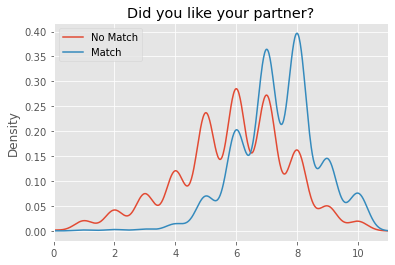

In [13]:
ax = df_res[df_res.match==0]['like'].plot(kind='kde', title='Did you like your partner?')
df_res[df_res.match==1]['like'].plot(kind='kde', ax=ax)
ax.legend(['No Match', 'Match'])
ax.set_xlim(0,11)

(0.0, 11.0)

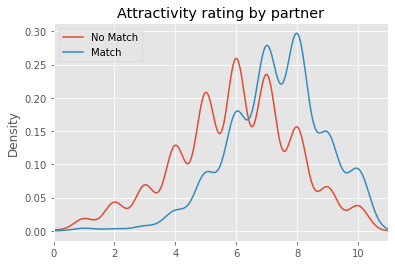

In [14]:
ax = df_res[df_res.match==0]['attractive_o'].plot(kind='kde', title='Attractivity rating by partner')
df_res[df_res.match==1]['attractive_o'].plot(kind='kde', ax=ax)
ax.legend(['No Match', 'Match'])
ax.set_xlim(0,11)

(0.0, 11.0)

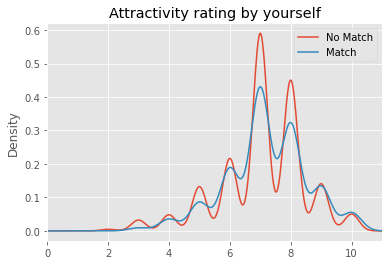

In [15]:
ax = df_res[df_res.match==0]['attractive'].plot(kind='kde', title='Attractivity rating by yourself')
df_res[df_res.match==1]['attractive'].plot(kind='kde', ax=ax)
ax.legend(['No Match', 'Match'])
ax.set_xlim(0,11)

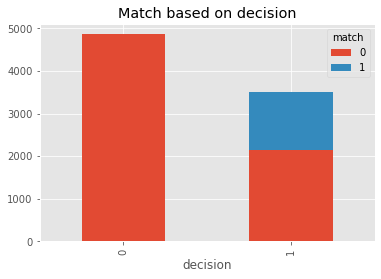

In [16]:
df_res.groupby(['decision', 'match'])['match'].count().unstack().fillna(0).plot(kind='bar', stacked=True, title="Match based on decision")

In [17]:
df_res.to_csv('speeddating_reduced.csv', index=False)

In [18]:
df_res[numeric_conv_cols]

,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
0,21.0,27.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,...,9.0,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0
1,21.0,22.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,...,9.0,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0
2,21.0,22.0,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,...,9.0,8.0,1.0,0.16,3.0,2.0,4.0,7.0,NaN,1.0
3,21.0,23.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,...,9.0,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0,0.0
4,21.0,24.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,...,9.0,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,25.0,26.0,1.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,...,10.0,7.0,3.0,0.64,10.0,NaN,3.0,2.0,5.0,0.0
8374,25.0,24.0,1.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,...,10.0,7.0,3.0,0.71,10.0,NaN,3.0,4.0,4.0,0.0
8375,25.0,29.0,1.0,1.0,40.0,10.0,30.0,10.0,10.0,NaN,...,10.0,7.0,3.0,-0.46,10.0,NaN,3.0,6.0,5.0,0.0
8376,25.0,22.0,1.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,...,10.0,7.0,3.0,0.62,10.0,NaN,3.0,5.0,5.0,0.0


## AutoML to find best Model

In [19]:
%%capture
!conda install gxx_linux-64 gcc_linux-64 swig -y
!pip install auto-sklearn scikit-learn

In [20]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.metrics
from sklearn.model_selection import KFold
from joblib import dump, load

/home/p/papstf/miniconda3/envs/automl/lib/python3.8/site-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [21]:
X = df_res[numeric_conv_cols]
y = df_res['match']
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [22]:
for idx, (train_index, test_index) in enumerate(kf.split(X)):
    model_fn = 'model_run_{:d}.joblib'.format(idx)
    if os.path.exists(model_fn):
        continue
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    automl = autosklearn.classification.AutoSklearnClassifier(n_jobs=-1)
    automl.fit(X_train, y_train)

    print(automl.sprint_statistics())

    dump(automl, model_fn)

[WARNING] [2020-06-23 14:55:04,180:smac.runhistory.runhistory.RunHistory] Encountered exception Expecting ',' delimiter: line 615 column 27 (char 18117) while reading runhistory from /tmp/autosklearn_tmp_4349_5214/smac3-output/run_2365658986/runhistory.json. Not adding any runs!
auto-sklearn results:
  Dataset name: 78559f770f235068b52f3d464e7850a6
  Metric: accuracy
  Best validation score: 0.866052
  Number of target algorithm runs: 499
  Number of successful target algorithm runs: 434
  Number of crashed target algorithm runs: 9
  Number of target algorithms that exceeded the time limit: 42
  Number of target algorithms that exceeded the memory limit: 14

auto-sklearn results:
  Dataset name: a45c84684a7e527ed154bb8ec0272b06
  Metric: accuracy
  Best validation score: 0.875813
  Number of target algorithm runs: 519
  Number of successful target algorithm runs: 460
  Number of crashed target algorithm runs: 14
  Number of target algorithms that exceeded the time limit: 27
  Number of

In [23]:
print(automl.sprint_statistics())
print(automl.show_models())

auto-sklearn results:
  Dataset name: aadef0b3b966f0a59659fd2ee1932109
  Metric: accuracy
  Best validation score: 0.863341
  Number of target algorithm runs: 504
  Number of successful target algorithm runs: 432
  Number of crashed target algorithm runs: 13
  Number of target algorithms that exceeded the time limit: 39
  Number of target algorithms that exceeded the memory limit: 20

[(0.300000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'adaboost', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'select_percentile_classification', 'classifier:adaboost:algorithm': 'SAMME', 'classifier:adaboost:learning_rate